<div align="center"> <b>TSIA202a 2021-2022</b> </div>
<div align="center"> Time series </div>
<div align="center"> <i>Louis Personnaz</i> </div>

In [1]:
import numpy as np
from scipy import signal as sig
from scipy import linalg as la
import matplotlib.pyplot as plt

# Exercise 1: Computing averages and covariances

### Autocovariance functions of the 3 models

- For $Z \sim \text{WN}(0, \sigma^2)$, the autocovariance function is $$\boxed{\gamma_Z(h) = \sigma^2 \delta_0(h)}$$

- $Y$ is an AR(1) process with coefficient $\phi \in ]-1, 1[$ i.e. $Y = (Y_t)_{t \in \mathbb{Z}} = (Z_t + \phi Y_{t-1})_{t \in \mathbb{Z}}$  
  We get $\forall t \in \mathbb{Z}, Y_t = \sum_{k=0}^{+\infty} \phi^k Z_{t-k}$  
  Thus
  $$\forall s \leq t, \mathrm{Cov}(Y_s, Y_t) =
  \mathrm{Cov}\left(\sum_{k=0}^{+\infty} \phi^k Z_{s-k}, \sum_{k=0}^{+\infty} \phi^k Z_{t-k}\right) =
  \sigma^2 \sum_{k=0}^{+\infty} \sum_{j=0}^{+\infty} \phi^{k+j} \delta_{s-k, t-j} =
  \sigma^2 \sum_{k=0}^{+\infty} \phi^{k + (t-s+k)} =
  \dfrac{\sigma^2 \phi^{t-s}}{1-\phi^2}$$
  After doing the same for $t \leq s$ :
  $$
  \forall s, t, \mathrm{Cov}(Y_s, Y_t) = \dfrac{\sigma^2 \phi^{|t-s|}}{1-\phi^2}
  $$
  hence
  $$\boxed{\gamma_Y(h) = \dfrac{\sigma^2 \phi^{|h|}}{1-\phi^2}}$$

- Sinusoidal process $X = (X_t)_{t \in \mathbb{Z}} = (A_0 \cos(\lambda_0 t + \phi_0) + Z_t)_{t \in \mathbb{Z}}$ where $\lambda_0 \in [0, \pi[$ and $\phi_0$ is a uniform random variable in $[0, 2\pi]$ independent from $Z_t$  
  
  $$
  \begin{align}
  \mathrm{Cov}(X_s, X_t) &= \mathrm{Cov}(A_0 \cos(\lambda_0 s + \phi_0) + Z_s, A_0 \cos(\lambda_0 t + \phi_0) + Z_t) \\
  &= A_0^2 \mathrm{Cov}(\cos(\lambda_0 s + \phi_0), \cos(\lambda_0 t + \phi_0)) + \sigma^2 \delta_{s-t} & \phi_0 \perp \!\!\! \perp Z \\
  &= A_0^2 \mathbb{E}\left[ \cos(\lambda_0 s + \phi_0)\cos(\lambda_0 t + \phi_0) \right] + \sigma^2 \delta_{s-t} & \forall k, \mathbb{E}\left[ \cos(\lambda_0 k + \phi_0)\right] = 0 \, \text{since} \, \phi_0 \sim \mathcal{U}([0, 2\pi]) \\
  &= \dfrac{A_0^2}{2} \mathbb{E}\left[ \cos(\lambda_0 (s-t))\cos(\lambda_0 (s+t) + 2\phi_0) \right] + \sigma^2 \delta_{s-t} \\
  &= \dfrac{A_0^2}{2} \cos(\lambda_0 (s-t)) + \sigma^2 \delta_{s-t}
  \end{align}
  $$  
  hence
  $$\boxed{\gamma_X(h) = \dfrac{A_0^2}{2} \cos(\lambda_0 h) + \sigma^2 \delta_0(h)}$$

![](fig1.png)

**blue: $\gamma_X(h)$, orange: $\gamma_Y(h)$, green: $\gamma_Z(h)$**

The inferred empirical autocovariances match with the theoretical calculations knowing that $\sigma^2 = 1, \dfrac{A_0^2}{2} = \dfrac{1}{2}, \dfrac{\sigma^2}{1-\phi^2} = 1.5625$.

<div style="display:flex">
    <img src="fig3.png" alt="drawing"/>
    <img src="fig2.png" alt="drawing"/>
</div>

# Exercise 2: Spectral density estimation and periodogram

## Question 1

$$
\begin{align}
I_n(\lambda) &= \dfrac{1}{2\pi} \sum_{h=-n+1}^{n-1} \gamma_n(h) e^{-i \lambda h} \\
&= \dfrac{1}{2\pi} \sum_{h=-n+1}^{n-1} \dfrac{1}{n} \sum_{t=0}^{n-1-h} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) e^{-i \lambda h} \\
&= \dfrac{1}{2\pi n} \sum_{h=1}^{n-1} \sum_{t=0}^{n-1-h} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) 2 \cos(\lambda h)
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2   &   \forall h<0, \gamma_n(h) = \gamma_n(|h|) \\
&= \dfrac{1}{2\pi n} \sum_{t=0}^{n-2} \sum_{h=1}^{n-1-t} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) 2 \cos(\lambda h)
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 \\
&= \dfrac{1}{2\pi n} \sum_{t=0}^{n-2} \sum_{l=t+1}^{n-1} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) 2 \cos(\lambda (l-t))
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2   &   l=h+t \\
&= \dfrac{1}{2\pi n} \sum_{0 \leq t < l \leq n-1} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) (e^{i\lambda(l-t)} + e^{-i\lambda(l-t)})
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 \\
&= \dfrac{1}{2\pi n} \sum_{\substack{0 \leq t,l \leq n-1 \\ t \ne l}} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) e^{-i \lambda (l-t)}
+ \dfrac{1}{2\pi n} \sum_{u=0}^{n-1} (X_u - \hat{\mu}_n)^2 \\
&= \dfrac{1}{2\pi n} \left( \sum_{0 \leq t,l \leq n-1} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) e^{-i \lambda (l-t)} \right) \\
&= \dfrac{1}{2\pi n} \left| \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n) e^{-i \lambda t} \right|^2
\end{align}
$$

We have shown that the periodogram is proportional to the squared modulus of the DTFT of $X_0 - \hat{\mu}_n, \dots, X_{n-1} - \hat{\mu}_n$.

## Question 2

$$
\forall m \geq n, \forall k \in \{0, \dots, m-1\}, I_n\left(2\pi \frac{k}{m}\right) =
\dfrac{1}{2\pi n} \left| \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n) e^{-2 i\pi \frac{k}{m} t} \right|^2
$$

To compute these quantities, we just have to call `np.fft.fft` on the array $(X_0 - \hat{\mu}_n, \dots, X_{n-1} - \hat{\mu}_n, 0, \dots, 0)$ where there are $m-n$ padded zeros.

In [3]:
H = 20                    # number of points for covariance
n = 2*H - 1               # number of process' samples
tc = np.arange(-(H-1),H)  # temporal axis for ACF

### AR(1) signal

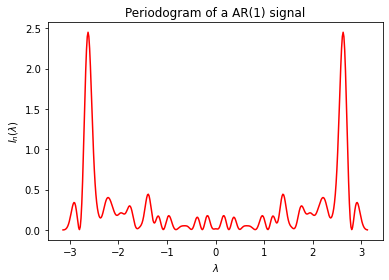

In [90]:
# Generate an AR(1) signal
Z = np.random.normal(0,1,n) # White noise
# Build the rational function P/Q
phi1  = 0.6
Pcoeffs = np.array([1.])                 
Qcoeffs = np.poly((phi1,))
# Use P/Q for filtering
X = sig.lfilter(Pcoeffs, Qcoeffs, Z)

# Plot the periodogram
m = 10*n
mu = np.mean(X)
Y = X - mu
I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)

plt.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='r')
plt.title('Periodogram of a AR(1) signal')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$I_n(\lambda)$')
plt.show()

### Harmonic signal

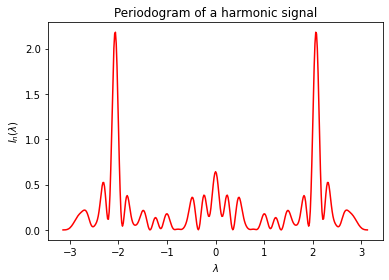

In [89]:
# Generate a harmonic signal
A_0 = 1
omega = np.pi/3
phi = np.pi + 2*np.pi*np.random.random_sample()
X = A_0 * np.cos(omega*tc + phi) +  np.random.normal(0,1,n)

# Plot the periodogram
m = 10*n
mu = np.mean(X)
Y = X - mu
I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)

plt.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='r')
plt.title('Periodogram of a harmonic signal')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$I_n(\lambda)$')
plt.show()

### White noise

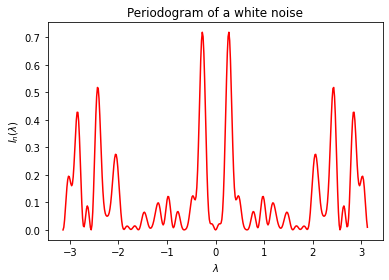

In [91]:
# Generate a white noise
sigma = 1
X = np.random.normal(0,sigma,n)

# Plot the periodogram
m = 10*n
mu = np.mean(X)
Y = X - mu
I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)

plt.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='r')
plt.title('Periodogram of a white noise')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$I_n(\lambda)$')
plt.show()

## Question 3

For $m = 2n-1$ we get $(n-1) - (-n+1) + 1 = 2n-2$ values $$I_n\left(2 \pi \dfrac{k}{m}\right) = \sum_{h=-n+1}^{n-1} \frac{1}{2\pi} \hat{\gamma}_n(h) \, e^{-2 i \pi \frac{k}{m} h}$$ for $k \in \{0, \dots, 2n-2\}$.

Thus $$\forall h \in \{-n+1, \dots, n-1\}, \dfrac{1}{2\pi} \hat{\gamma}_n(h) = \dfrac{1}{m} \sum_{k=-n+1}^{n-1} I_n\left(2 \pi \dfrac{k}{m}\right) e^{2 i \pi \frac{h}{m} k}$$ that is to say the vector `gamma` is proportional to the `np.fft.ifft` of `I`.

In [5]:
def acovb(X=None):
    Xc = X - np.mean(X)
    n = X.size
    m = 2*n - 1
    I = np.abs(np.fft.fft(Xc, m))**2 / (2 * np.pi * n)
    gamma = 2 * np.pi * np.fft.ifft(I)
    return np.real(gamma)  # discard the imaginary part, which is theoretically zero

### Harmonic signal

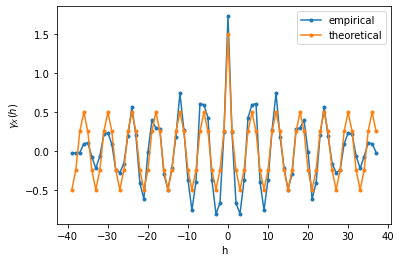

In [23]:
A_0 = 1
omega = np.pi/3
phi = np.pi + 2*np.pi*np.random.random_sample()
X = A_0 * np.cos(omega*tc + phi) +  np.random.normal(0,1,n)

gamma = acovb(X)
gamma_th = A_0**2/2 * np.cos(omega * np.arange(-n, n-1))
gamma_th[n] += 1

plt.plot(np.arange(-n, n-1), np.roll(gamma, n), label='empirical', marker='.')
plt.plot(np.arange(-n, n-1), gamma_th, label='theoretical', marker='.')
plt.xlabel('h')
plt.ylabel(r'$\gamma_X(h)$')
plt.legend()
plt.show()

### AR(1) signal

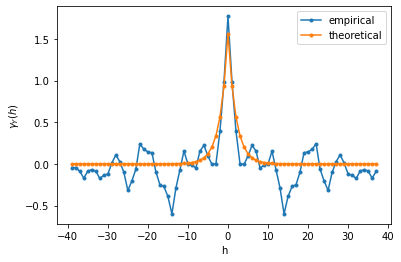

In [21]:
# Generate an AR(1) signal
Z = np.random.normal(0,1,n) # White noise
# Build the rational function P/Q
phi1  = 0.6
Pcoeffs = np.array([1.])                 
Qcoeffs = np.poly((phi1,))
# Use P/Q for filtering
X = sig.lfilter(Pcoeffs, Qcoeffs, Z)

gamma = acovb(X)
gamma_th = 1/(1 - phi1**2) * phi1**np.abs(np.arange(-n, n-1))

plt.plot(np.arange(-n, n-1), np.roll(gamma, n), label='empirical', marker='.')
plt.plot(np.arange(-n, n-1), gamma_th, label='theoretical', marker='.')
plt.xlabel('h')
plt.ylabel(r'$\gamma_Y(h)$')
plt.legend()
plt.show()

### White noise

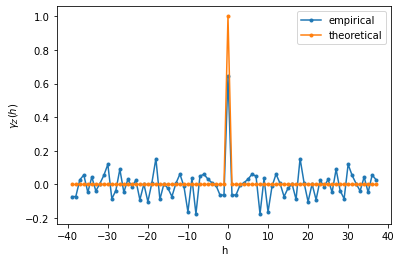

In [11]:
sigma = 1
X = np.random.normal(0,sigma,n)

gamma = acovb(X)
gamma_th = np.zeros(2*n-1)
gamma_th[n] = 1

plt.plot(np.arange(-n, n-1), np.roll(gamma, n), label='empirical', marker='.')
plt.plot(np.arange(-n, n-1), gamma_th, label='theoretical', marker='.')
plt.xlabel('h')
plt.ylabel(r'$\gamma_Z(h)$')
plt.legend()
plt.show()

## Question 4

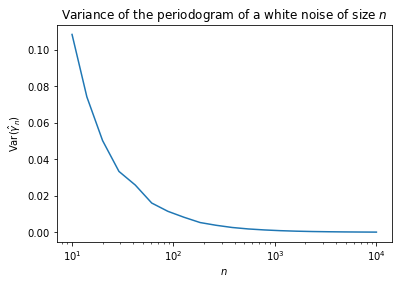

In [235]:
variances = []
for n in np.logspace(1, 4, 20, dtype=int):
    acc = []
    for i in range(50):  # average the variance of the periodogram over many experiences
        X = np.random.normal(0, 1, n)
        gamma = acovb(X)
        var = np.var(gamma)
        acc.append(var)
    variances.append(np.mean(acc))
plt.plot(np.logspace(1, 4, 20, dtype=int), variances)
plt.xscale('log')
plt.title(r'Variance of the periodogram of a white noise of size $n$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\mathrm{Var}(\hat{\gamma}_n)$')
plt.show()

The variance of the periodogram seems to decrease towards 0 as n approaches infinity. Indeed, we observe the signal over a longer period, thus we can infer $\hat{\gamma}_n$ with more accuracy. Moreover, the empirical periodogram gets closer and closer to the theoretical one.

# Exercise 3: Filtering random processes

## Part I - Yule-Walker equations

Let $X$ be a real, causal, zero-mean AR-($p$) process defined by
$$X_t = \sum_{k=1}^p \phi_k X_{t-k} + Z_t$$
where $Z \sim \text{WN}(0, \sigma^2)$

### Question 1

Since $X$ is causal, there exists $(\alpha_k)_{k \in \mathbb{N}}$ such that $X_t = \sum_{k=0}^{+\infty} \alpha_k Z_{t-k}$ thus ($X$ and $Z$ are centered)
$$
\forall h \ge 1, \mathbb{E}(X_{t-h}Z_t) = \mathbb{E}\left[ \left(\sum_{k=0}^{+\infty} \alpha_k Z_{t-h-k}\right) Z_t \right] =
\mathrm{Cov}\left(\sum_{k=0}^{+\infty} \alpha_k Z_{t-h-k}, Z_t\right) =
\sum_{k=0}^{+\infty} \alpha_k \mathrm{Cov}(Z_{t-h-k}, Z_t) =
\sum_{k=0}^{+\infty} \alpha_k \delta_{h+k} = 0
$$

### Question 2

$\forall h \ge 1$,
$$
\gamma(h) = \mathrm{Cov}(X_t, X_{t-h}) =
\mathrm{Cov}\left(\sum_{k=1}^p \phi_k X_{t-k} + Z_t, X_{t-h}\right) =
\sum_{k=1}^p \phi_k \mathrm{Cov}(X_{t-k}, X_{t-h}) + \mathrm{Cov}(Z_t, X_{t-h}) =
\sum_{k=1}^p \phi_k \gamma(h-k) + \bar{0} =
\sum_{k=1}^p \phi_k \gamma(h-k)
$$

### Question 3

$$
\gamma(0) = \mathrm{Cov}(X_t, X_t) =
\mathrm{Cov}\left(\sum_{k=1}^p \phi_k X_{t-k} + Z_t, X_t\right) =
\sum_{k=1}^p \phi_k \mathrm{Cov}(X_{t-k}, X_t) +  \mathrm{Cov}(Z_t, X_t) =
\sum_{k=1}^p \phi_k \gamma(-k) + \mathrm{Cov}\left(Z_t, \sum_{k=0}^{+\infty} \alpha_k Z_{t-k}\right) =
\sum_{k=1}^p \phi_k \gamma(-k) + \sigma^2
$$

### Question 4

We thus get
$$
\Gamma_{p+1} =
\begin{bmatrix}
\gamma(0) & \gamma(-1) & \dots & \dots & \gamma(-p) \\
\gamma(1) & \gamma(0) & \ddots & \ddots & \gamma(-p+1) \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \gamma(-1) \\
\gamma(p) & \gamma(p-1) & \dots & \gamma(1) & \gamma(0) 
\end{bmatrix}
=
[\gamma(i-j)]_{i,j \in \{0, \dots, p\}}
$$
which satisfies
$$
\Gamma_{p+1}
\begin{bmatrix}
1 \\
-\phi_1 \\
\vdots \\
\vdots \\
-\phi_p 
\end{bmatrix}
=
\begin{bmatrix}
\sigma^2 \\
0 \\
\vdots \\
\vdots \\
0 
\end{bmatrix}
$$

## Part II - Estimation

In [63]:
def genAR(p, n, noiseSTD=1):
# Returns    
# X :   Generated AR process 
# phi : coefficients or recurrence equation 
#       X(t) = phi(1)X(t-1)+...+phi(p)X(t-p) + Z(t);
#       Z(t) is WN(0,1).
# p :   Order of AR filter
# n :   Number of output samples
# noiseSTD : STD of the white noise. Default = 1

    # random draw of int(p/2) complex roots inside the unit circle 
    nrc = int(p/2) #% number of complex roots

    # Set the module of the poles in the (0.5 0.999) interval
    rho = .5+0.499*np.sqrt(np.random.random_sample(nrc)) 
    theta = 2*np.pi*np.random.random_sample(nrc)
    zk = rho *np.exp(1.j *theta);
    #
    # Compute transient lenght
    zmax = zk[np.abs(zk)==np.max(np.abs(zk))]
    rhomax = np.abs(zmax)
    tau = -1./np.log(rhomax) 
    transient = int(5*tau)    #  we allow for some room
    
    zk = np.concatenate((zk, np.conjugate(zk)))
    if np.remainder(p,2): # we need to add one real positive root in the interval (0,1)
        realRoot = np.random.random_sample()
        zk =  np.concatenate(([realRoot], zk))
                                      
    coeff = np.poly(zk) # coefficients of polynomial p(z) = prod_k( z-z_k);
    coeff = np.real(coeff) # remove possible imag residuals due to limited precision
    
    
    phi = -coeff[1:];
                
    # White noise generation. Lenght = n+transient
    noise = noiseSTD*np.random.randn(n+transient)

    # AR signal generation
    X =  sig.lfilter([1], coeff, noise)
    
    # Removing the transient
    X=X[transient:]

    return X, phi

def acovb(X=None):
    Xc = X - np.mean(X)
    m = 2 * X.size - 1
    I = np.abs(np.fft.fft(Xc,m)) ** 2 /  X.size
    gamma = np.real(np.fft.ifft(I))
    gamma = gamma[0:X.size]
    return gamma

In [58]:
n = 1000
p = 4
std = 1

In [59]:
X, phi = genAR(p, n, std)
coeff = np.concatenate(([1], -phi))

In [60]:
gamma = acovb(X)
Gamma_hat = la.toeplitz(gamma[0:p+1])

v1 = np.zeros(p+1)
v1[0] = 1

# intermediate vector
v = np.matmul(la.inv(Gamma_hat), v1)

# estimating the variance
sigma2Est = 1/v[0]

# estimating the AR coefficients
estimated_coeff = sigma2Est * v
estimated_coeff[0] = 1

print(f"estimated coeffs: {estimated_coeff}")
print(f"coeffs: {coeff}")

estimated coeffs: [1.         1.32679239 1.97191714 1.07614607 0.66361901]
coeffs: [1.         1.30535744 1.97613663 1.06745577 0.68246242]


Relative error 1.05%: 


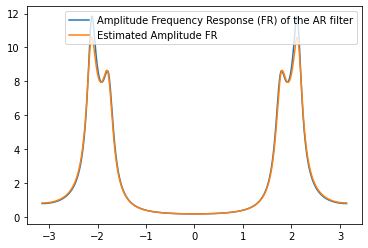

In [61]:
err = coeff - estimated_coeff
rel_err =  np.linalg.norm(err)/np.linalg.norm(coeff) 
print('Relative error {0:.2%}: '.format(rel_err))

# Show spectra
plt.figure()
nPoints = int(np.exp2( np.ceil(np.log2(X.size))))
nu = np.linspace(-0.5, 0.5 - 1/nPoints, nPoints)
omega = 2*np.pi*nu
w1, H1 = sig.freqz([1], coeff, omega)
w2, H2 = sig.freqz([1], estimated_coeff, omega)
plt.plot(w1,abs(H1))
plt.plot(w2,abs(H2))
plt.legend(['Amplitude Frequency Response (FR) of the AR filter','Estimated Amplitude FR' ])
plt.show()

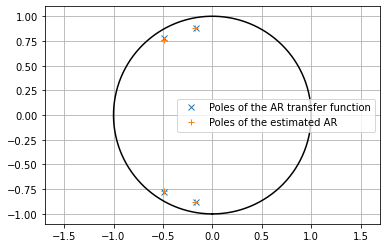

In [62]:
# Display poles
plt.figure()
plt.axis('equal')
plt.grid()
zk    = np.roots(coeff)
plt.plot(np.real(zk),np.imag(zk), 'x' )
zk2 = np.roots(estimated_coeff)
plt.plot(np.real(zk2),np.imag(zk2), '+' )
plt.legend(['Poles of the AR transfer function','Poles of the estimated AR'])
t = np.linspace(-np.pi,np.pi,1000)
plt.plot(np.sin(t),np.cos(t), 'black')
plt.show()

## Part III - Application to speech signal

### Question 1

Since the fundamental frequency $f_0 = \dfrac{1}{T}$ is generally in the interval $[80\,\mathrm{Hz}, 400\,\mathrm{Hz}]$, we get $\dfrac{1}{400} \le T \le \dfrac{1}{80}$ (*in seconds*).

Knowing that the sampling frequency is $F_s = 8000\,\mathrm{Hz}$, we get `minT` $= \dfrac{8000}{400} = 20$ (*samples*) and `maxT` $= \dfrac{8000}{80} = 100$ (*samples*)

In [ ]:
## AR estimation    
## estimate the coefficients for the current frame

gamma =  rp.acovb(frame)
Gamma_hat = la.toeplitz(gamma[0:p])
v1 = np.zeros(p)
v1[0] = 1
v = la.inv(Gamma_hat) @ v1

# estimating the variance
sigma2Est = 1/v[0]

# estimating the AR coefficients
estimated_coeff = sigma2Est * v
estimated_coeff[0] = 1

coeff[:,frameIndex] = estimated_coeff # 1D array of size p
sigma2[frameIndex]  = sigma2Est # scalar

c1 = estimated_coeff

### Question 2

The PSD from the AR model seems to be a smoothed out (averaged) version of the empirical PSD. Indeed, we used a simplified AR-(12) model to model the empirical (complex) signal.

![](fig4.png)

### Question 3

![](fig5.png)

From top to bottom:
- waveform of the resynthesized signal
- pitch of the resynthesized signal
- variance of the white noise

By modifying the following line in the synthesis code:

`T = pitch[frameIndex]` to `T = alpha*pitch[frameIndex]`
where `alpha` $= \dfrac{1}{2^k}$

we get a modified sentence which is $k$ octaves higher.

The generated `synth.wav` file is in the `python_scripts` folder.